In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn import svm

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [3]:
# Gaussian kernal function
def gaussianKernel(x1,x2,sigma=2):
    norm=np.sum(np.square(x1-x2))
    return(np.exp(-norm/(2*np.square(sigma))))

In [4]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussianKernel(x1, x2, sigma)

0.32465246735834974

In [5]:
# load data
data = loadmat('./ex6data3.mat')
print(data.keys())
X, y = data['X'],data['y']
Xval,yval = data['Xval'],data['yval']


dict_keys(['__version__', 'Xval', '__header__', '__globals__', 'yval', 'y', 'X'])


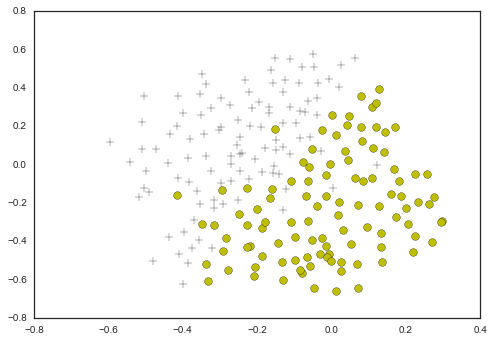

In [6]:
# plot data
def plotData(X,y):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    plt.scatter(X[pos,0],X[pos,1],marker='+',s=60,c='k')
    plt.scatter(X[neg,0],X[neg,1],marker='o',s=60,c='y')

plotData(X,y)

In [7]:
#Function to draw the SVM boundary
def plotBoundary(my_svm, xmin, xmax, ymin, ymax):
    """
    Function to plot the decision boundary for a trained SVM
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the SVM classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    xvals = np.linspace(xmin,xmax,100)
    yvals = np.linspace(ymin,ymax,100)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            zvals[i][j] = float(my_svm.predict(np.c_[xvals[i],yvals[j]]))
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( u, v, zvals )
    plt.title("Decision Boundary")    

In [23]:
# train the svm
Cvalues=[0.01,0.03,0.1,0.3,1,3,10,30]
SigmaValues=[0.01,0.03,0.1,0.3,1,3,10,30]
bestParameter=[(0,0),0]
#SVM initializing
for C in Cvalues:
    for sigma in SigmaValues:
        gamma=np.power(sigma,-2.0)
        my_svm = svm.SVC(C=C, kernel='rbf',gamma=gamma)
        #SVM training
        my_svm.fit(X, y.ravel())
        #SVM predicting
        error = my_svm.score(Xval,yval)
        if error > bestParameter[1]:
            bestParameter[1]=error
            bestParameter[0]=(C,sigma)
print(bestParameter)
my_svm = svm.SVC(C=bestParameter[0][0], kernel='rbf',gamma=np.power(bestParameter[0][1],-2.0))
my_svm.fit(X, y.ravel())

[(0.3, 0.1), 0.96499999999999997]


SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=99.999999999999986,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

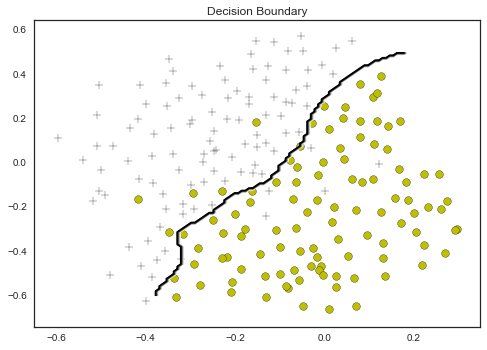

In [20]:
# plot the results
plotData(X,y)
plotBoundary(my_svm, -0.5, 0.3, -0.6, 0.5)